# SAN - Praktische Arbeit (Marvel Universe Social Network)

## Netzwerkanalyse

In [1]:
import os
import sys
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from helper import *

## Daten einlesen

In [2]:
nodes = pd.read_csv('Daten/nodes.csv')
edges = pd.read_csv('Daten/edges.csv')
hero_network = pd.read_csv('Daten/hero-network.csv')

print(nodes.head())
print(edges.head())
print(hero_network.head())

                   node   type
0               2001 10  comic
1                2001 8  comic
2                2001 9  comic
3  24-HOUR MAN/EMMANUEL   hero
4  3-D MAN/CHARLES CHAN   hero
                   hero   comic
0  24-HOUR MAN/EMMANUEL  AA2 35
1  3-D MAN/CHARLES CHAN   AVF 4
2  3-D MAN/CHARLES CHAN   AVF 5
3  3-D MAN/CHARLES CHAN   COC 1
4  3-D MAN/CHARLES CHAN  H2 251
                  hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3         LITTLE, ABNER        PRINCESS ZANDA
4         LITTLE, ABNER  BLACK PANTHER/T'CHAL


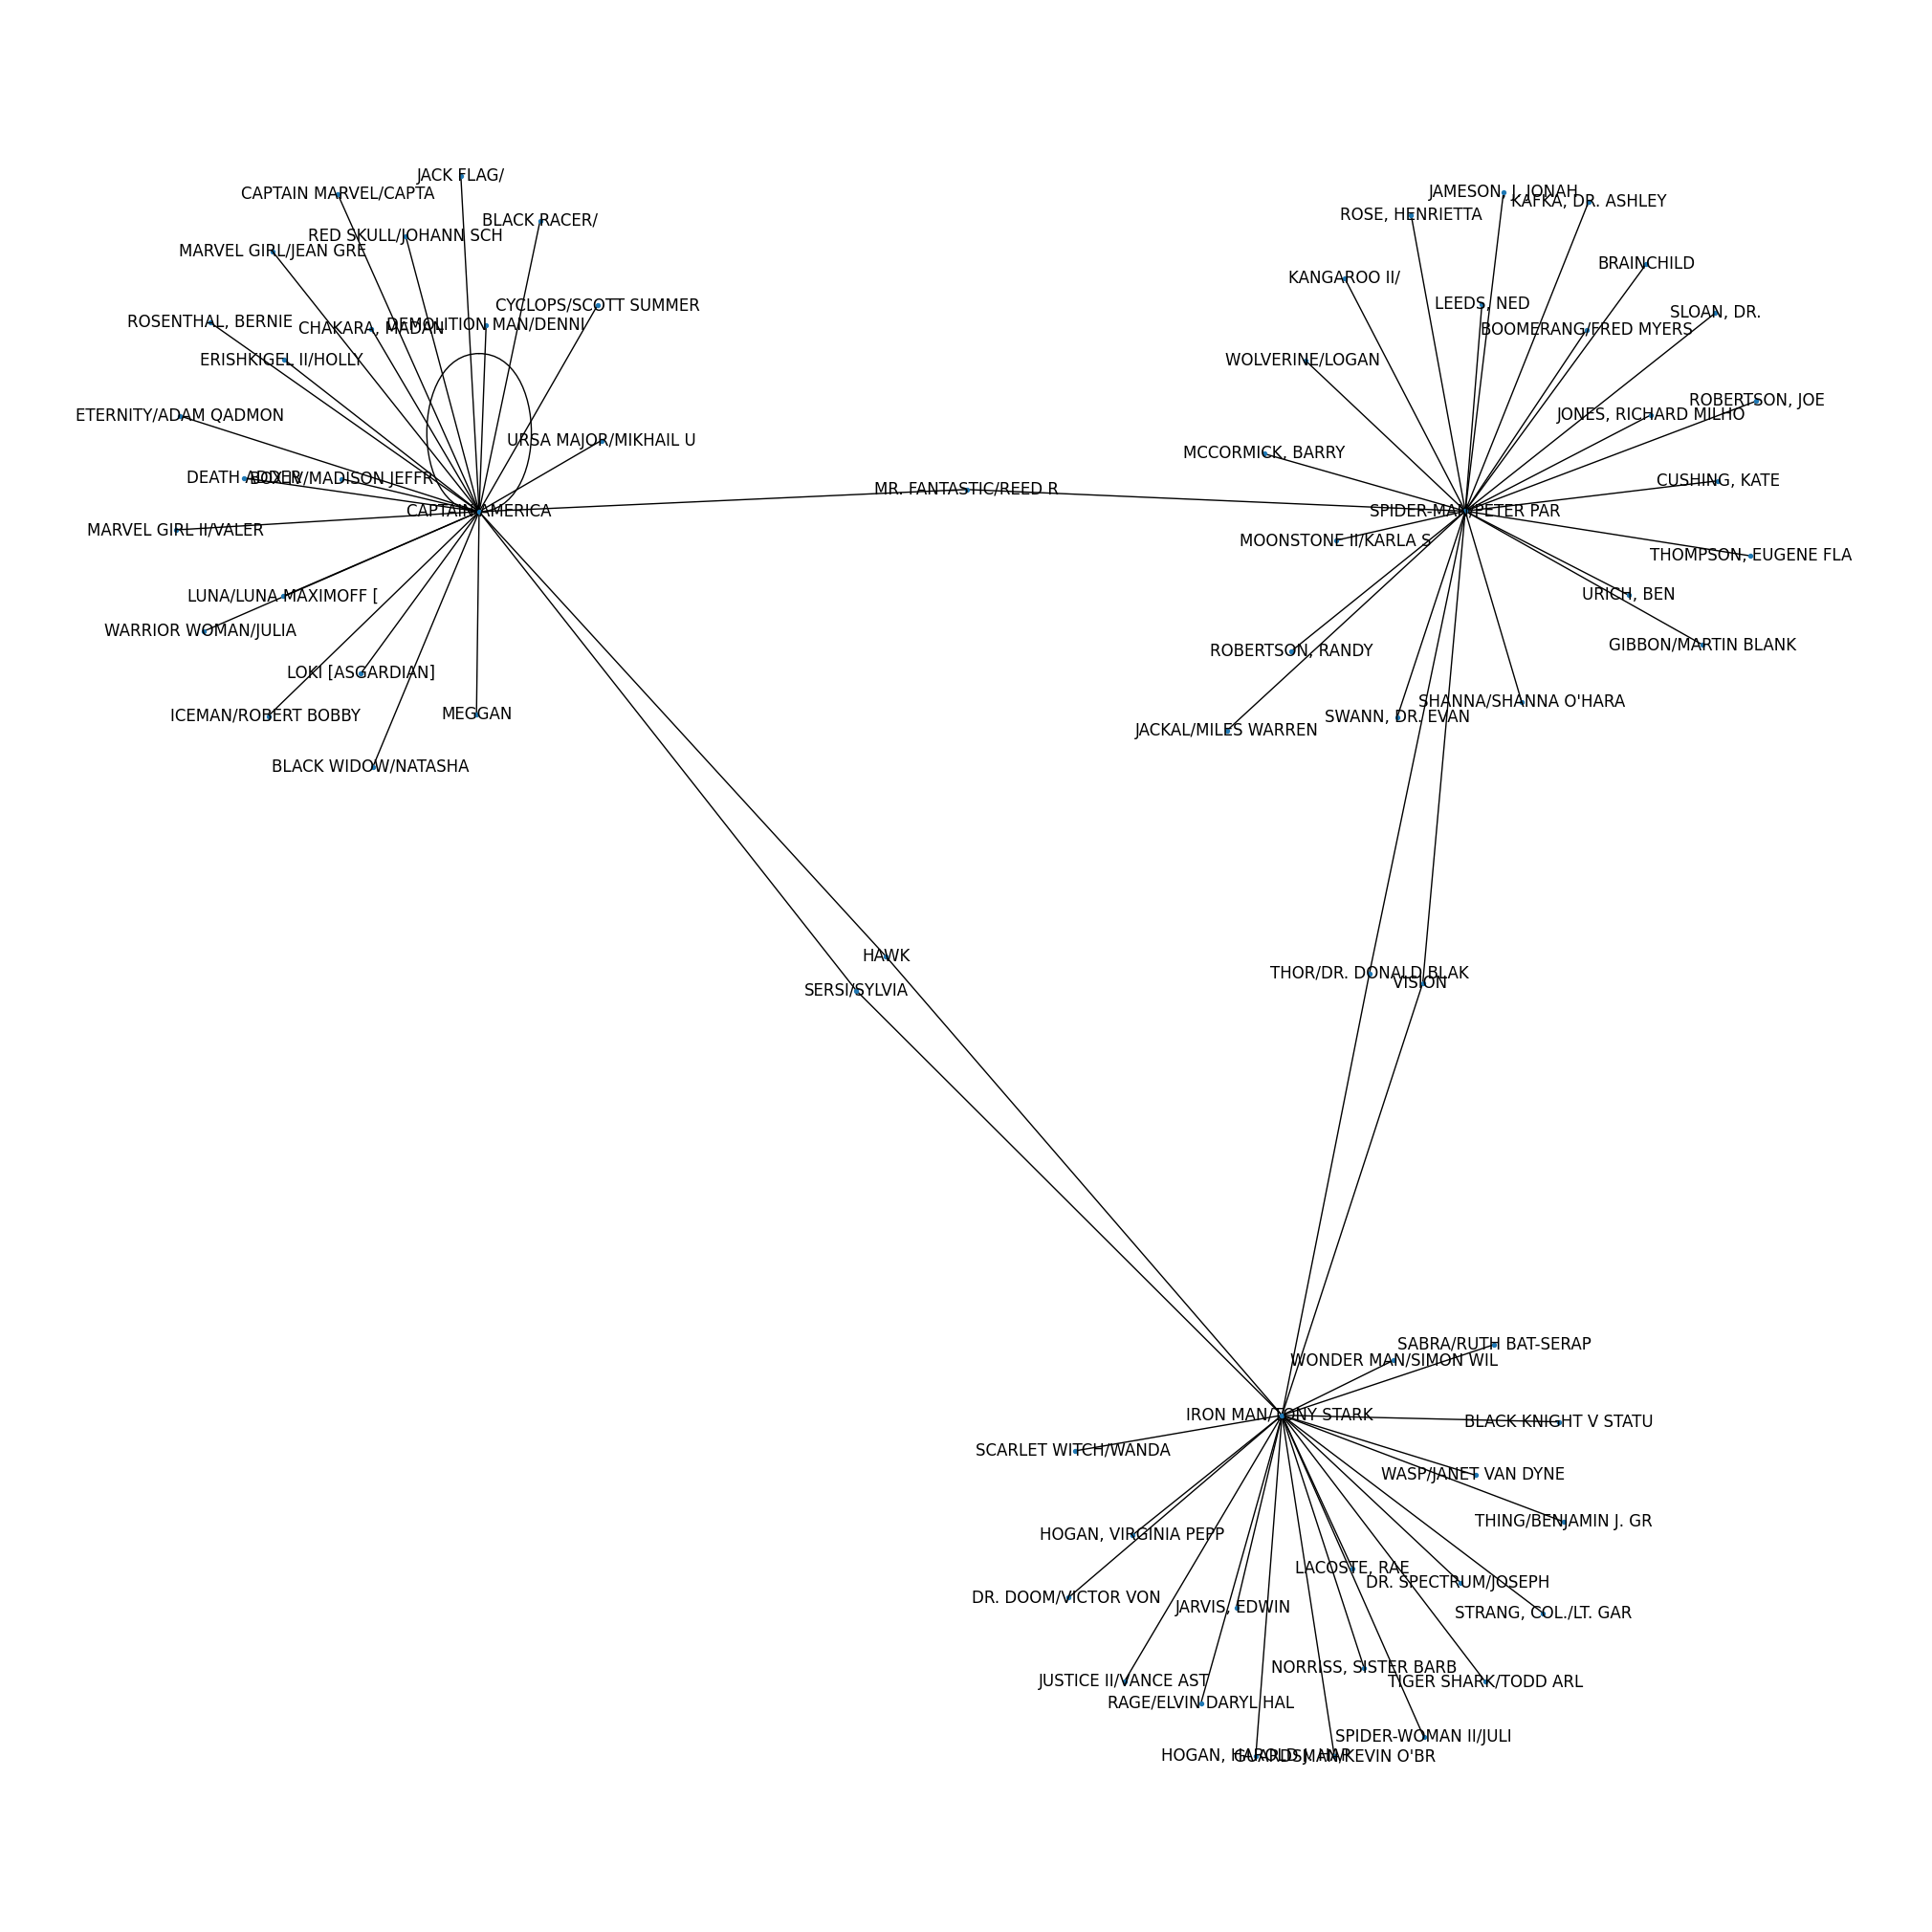

In [3]:
# connection between captain america,ironman and spiderman
captAmerica = Subset = hero_network[hero_network['hero1'] == 'CAPTAIN AMERICA'].sample(25)
ironMan = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)
spiderMan = hero_network[hero_network['hero1'].str.contains('SPIDER-MAN/PETER PAR')].sample(25)
Subset = pd.concat([captAmerica, ironMan, spiderMan], axis=0)

G = nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, node_size=8)
plt.show()

Im EDA haben wir herausgefunden, dass Captain America, Ironman und Spider-Man im `hero-network.csv` die meisten verbindungen haben. Dehalb geben wir diese 3 Helden als Subset aus und visualisieren diese.